In [3]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [5]:
# Load the data into a DataFrame
df = pd.read_csv('layoffs.csv')

In [3]:
# Print the first few rows of the data
print(df.head())

      company       location        industry  total_laid_off  \
0         N26         Berlin         Finance            71.0   
1   Providoor      Melbourne            Food             NaN   
2     Dropbox    SF Bay Area           Other           500.0   
3       Vroom  New York City  Transportation           120.0   
4  Greenhouse  New York City      Recruiting           100.0   

   percentage_laid_off        date           stage        country  \
0                 0.04  2023-04-28        Series E  United States   
1                 1.00  2023-04-28         Unknown      Australia   
2                 0.16  2023-04-27        Post-IPO  United States   
3                 0.11  2023-04-27        Post-IPO  United States   
4                 0.12  2023-04-27  Private Equity  United States   

   funds_raised  
0        1700.0  
1           NaN  
2        1700.0  
3        1300.0  
4         110.0  


In [4]:
#displays the last five rows of the dataframe
df.tail()

company        location   industry  total_laid_off  \
2540    Panda Squad     SF Bay Area   Consumer             6.0   
2541  Tamara Mellon     Los Angeles     Retail            20.0   
2542       EasyPost  Salt Lake City  Logistics            75.0   
2543      Blackbaud      Charleston      Other           500.0   
2544           Open       Bengaluru    Finance            47.0   

      percentage_laid_off        date     stage        country  funds_raised  
2540                 0.75  2020-03-13      Seed  United States           1.0  
2541                 0.40  2020-03-12  Series C  United States          90.0  
2542                  NaN  2020-03-11  Series A  United States          12.0  
2543                 0.14         NaN  Post-IPO  United States           NaN  
2544                  NaN         NaN  Series D          India         190.0

In [5]:
# Print the shape of the data
print(df.shape)

(2545, 9)


In [6]:
#Prints the column names
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [7]:
#gives the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2545 non-null   object 
 1   location             2545 non-null   object 
 2   industry             2543 non-null   object 
 3   total_laid_off       1746 non-null   float64
 4   percentage_laid_off  1694 non-null   float64
 5   date                 2543 non-null   object 
 6   stage                2539 non-null   object 
 7   country              2545 non-null   object 
 8   funds_raised         2297 non-null   float64
dtypes: float64(3), object(6)
memory usage: 179.1+ KB


In [8]:
# Print the data types of each column
print(df.dtypes)

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object


In [9]:
# Print the summary statistics of the data
print(df.describe())

       total_laid_off  percentage_laid_off   funds_raised
count     1746.000000          1694.000000    2297.000000
mean       256.022337             0.260577     814.143794
std        841.557354             0.258415    5448.104463
min          3.000000             0.000000       0.000000
25%         38.000000             0.100000      50.000000
50%         80.000000             0.170000     156.000000
75%        180.000000             0.300000     442.000000
max      12000.000000             1.000000  121900.000000


In [10]:
#To get a count of unique values in a specific column,
df.nunique()

company                2021
location                206
industry                 29
total_laid_off          299
percentage_laid_off      76
date                    528
stage                    16
country                  62
funds_raised            652
dtype: int64

In [11]:
#computes the correlation between columns 
df.corr()

total_laid_off  percentage_laid_off  funds_raised
total_laid_off             1.000000            -0.054693      0.095587
percentage_laid_off       -0.054693             1.000000     -0.067444
funds_raised               0.095587            -0.067444      1.000000

In [12]:
#Data pre-processing
df.isna().any()

company                False
location               False
industry                True
total_laid_off          True
percentage_laid_off     True
date                    True
stage                   True
country                False
funds_raised            True
dtype: bool

In [13]:
# returns the number of missing values in the dataset.
df.isnull().sum()

company                  0
location                 0
industry                 2
total_laid_off         799
percentage_laid_off    851
date                     2
stage                    6
country                  0
funds_raised           248
dtype: int64

In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(inplace=True)

In [15]:
## returns the number of missing values in the dataset.
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

In [16]:
df.isna().any()

company                False
location               False
industry               False
total_laid_off         False
percentage_laid_off    False
date                   False
stage                  False
country                False
funds_raised           False
dtype: bool

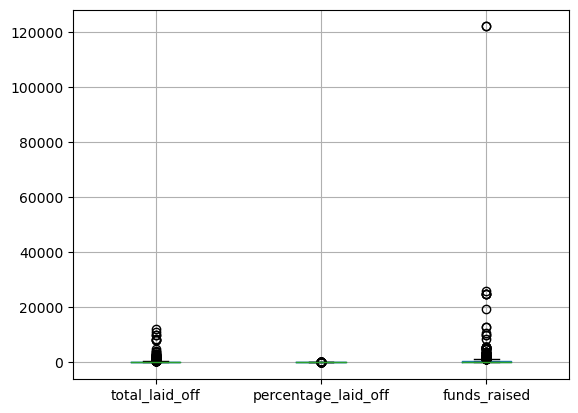

In [17]:
#Handling outliers
df.boxplot()
plt.show()

# Scatter plot for layoffs by industry and funds raised

In [21]:
# Creating the scatter plot
figure = px.scatter(df, x="funds_raised", y="total_laid_off", color="industry",
                 hover_name="company", hover_data=["stage", "date", "location"])
# Adding axis titles and formatting the tooltip
figure.update_layout(title="Layoffs by Industry and Funds Raised",
                  xaxis_title="Funds Raised (in Millions $)",
                  yaxis_title="Total Laid Off",
                  hoverlabel=dict(bgcolor="white", font_size=12))
# Showing the plot
figure.show()

# Bar chart for layoffs by company name and funds and date raised 

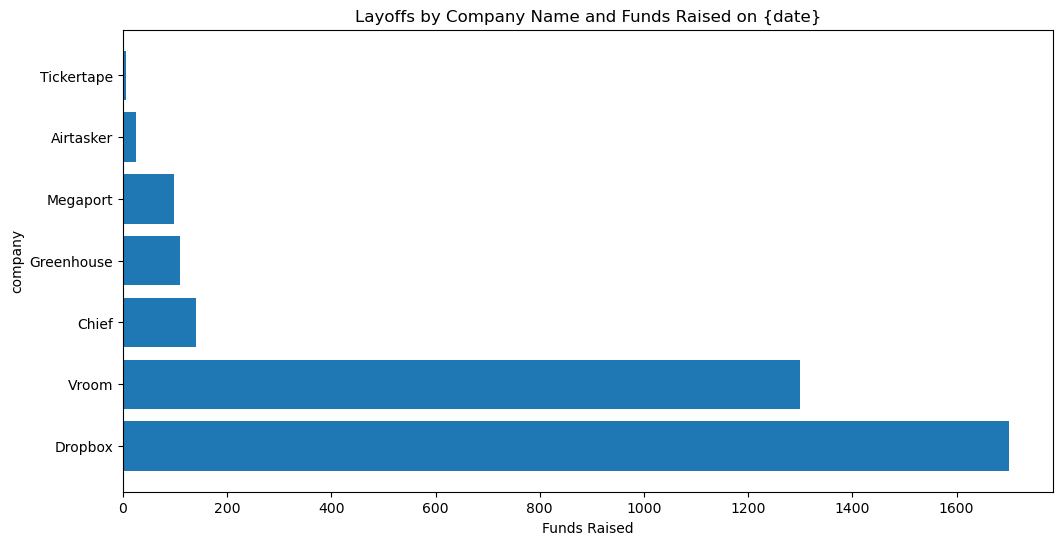

In [22]:
# Filtering the dataset for a specific date
date = '2023-04-27'
df_filter_date = df[df['date']==date]

# Grouping the data by company name and sum the funds raised
df_group_attr = df_filter_date.groupby('company')['funds_raised'].sum().reset_index()

# Sorting the data by funds raised in descending order
df_sort = df_group_attr.sort_values('funds_raised', ascending=False)

# Setting the figure size
plt.figure(figsize=(12,6))

# Creating a horizontal bar plot
plt.barh(df_sort['company'], df_sort['funds_raised'])

# Setting the plot title and axis labels
plt.title('Layoffs by Company Name and Funds Raised on {date}')
plt.xlabel('Funds Raised')
plt.ylabel('company')

# Displaying the plot
plt.show()

# Line plot of the number of layoffs by month

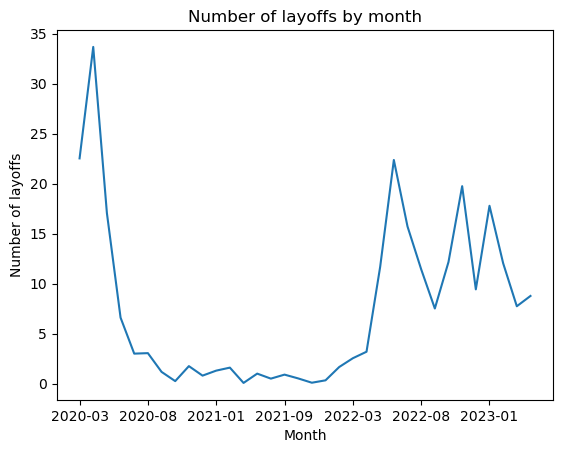

In [33]:
df['month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df.groupby('month')['percentage_laid_off'].sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of layoffs')
plt.title('Number of layoffs by month')
plt.show()

# Stacked bar plot of the number of layoffs by industry and location

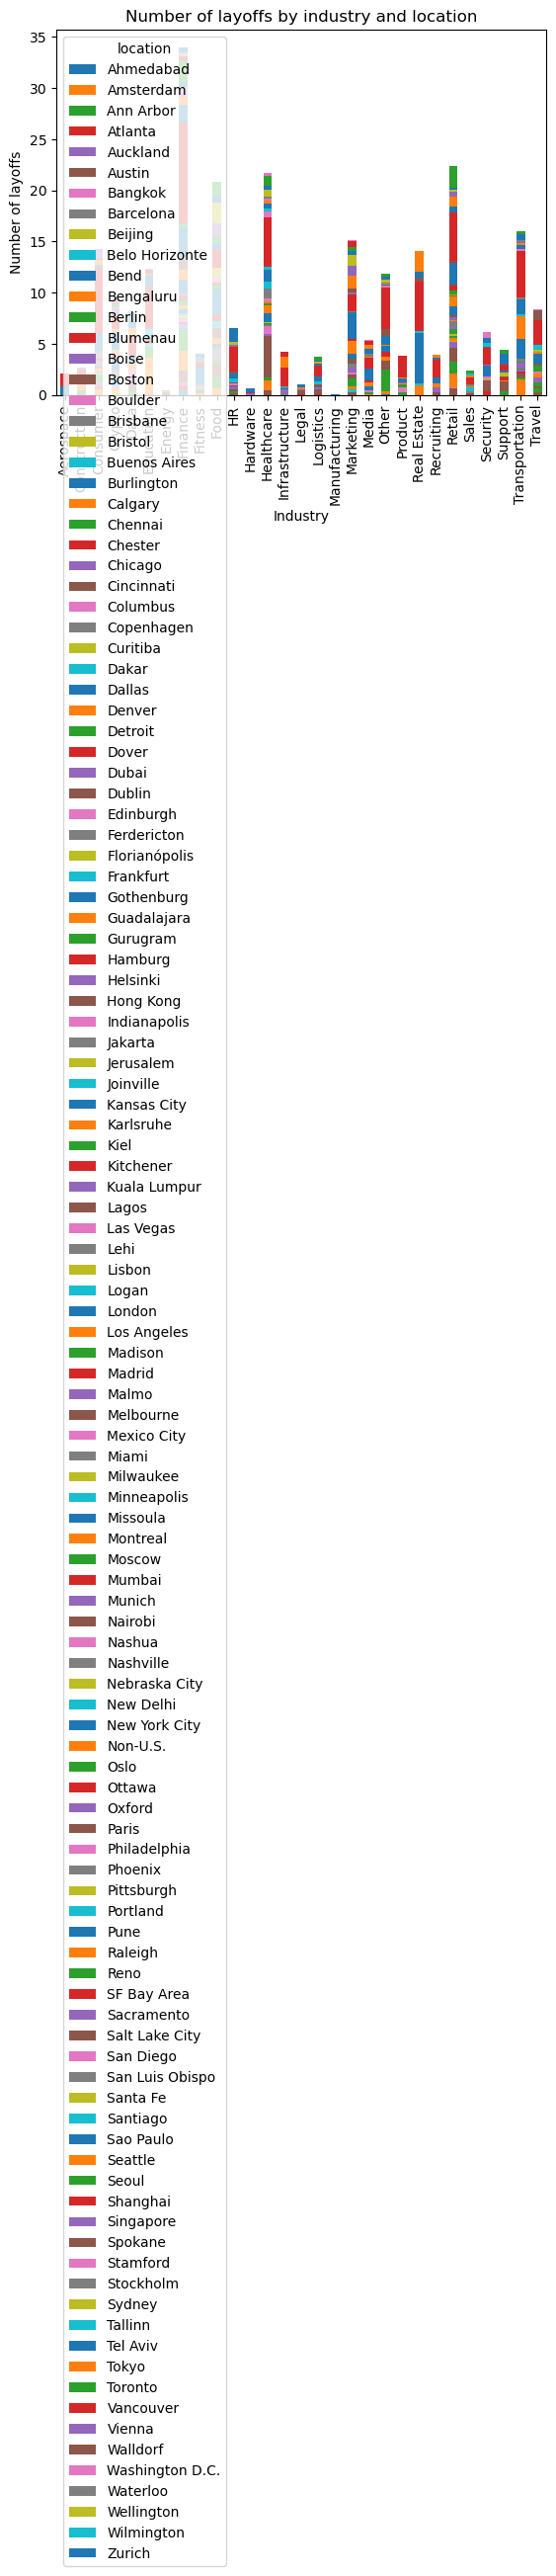

In [34]:
pivot = df.pivot_table(index='industry', columns='location', values='percentage_laid_off', aggfunc=np.sum)
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Number of layoffs')
plt.title('Number of layoffs by industry and location')
plt.legend(title='location', loc='upper left')
plt.show()

# Scatter plot of the number of employees affected by industry and year

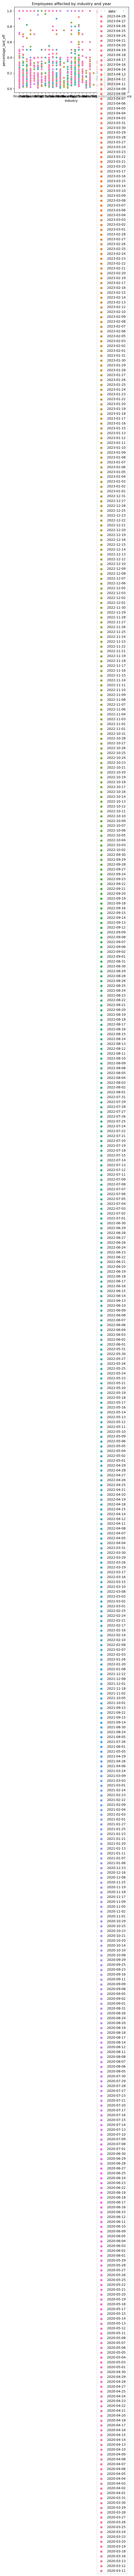

<Figure size 1200x1200 with 0 Axes>

In [14]:
sns.scatterplot(x='industry', y='percentage_laid_off', hue='date', data=df)
plt.title('Employees affected by industry and year')
plt.xlabel('industry')
plt.figure(figsize=(12,12))

plt.show()

# Bar plot of the number of layoffs per industry

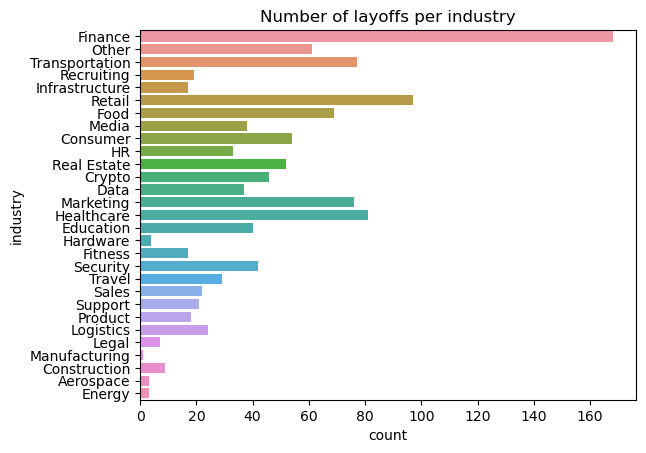

In [24]:
sns.countplot(y='industry', data=df)
plt.title('Number of layoffs per industry')
plt.xlabel('count')
plt.show()

# Box plot of the number of employees affected by year

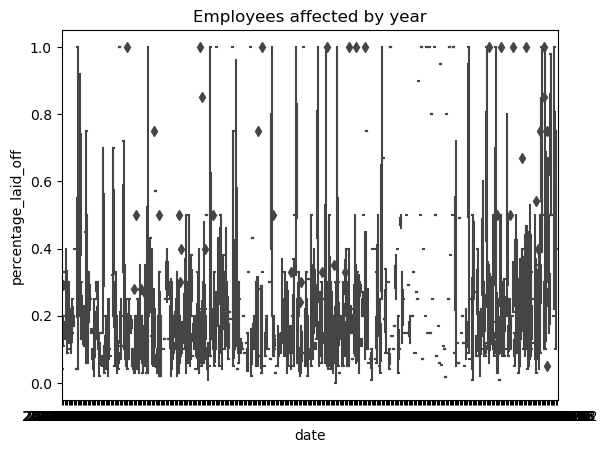

In [26]:
sns.boxplot(x='date', y='percentage_laid_off', data=df)
plt.title('Employees affected by year')
plt.xlabel('date')
plt.show()

# Average employees affected per layoff

In [27]:
df['employees_affected_per_layoff'] = df['percentage_laid_off'] / df['total_laid_off']
avg_employees_affected_per_layoff = df['total_laid_off'].mean()
print(f'Average employees affected per layoff: {avg_employees_affected_per_layoff}')

Average employees affected per layoff: 265.9364806866953


# Percentage of layoffs per industry

In [28]:
industry_counts = df['industry'].value_counts(normalize=True) * 100
print(f'Percentage of layoffs per industry:\n{industry_counts}')

Percentage of layoffs per industry:
Finance           14.420601
Retail             8.326180
Healthcare         6.952790
Transportation     6.609442
Marketing          6.523605
Food               5.922747
Other              5.236052
Consumer           4.635193
Real Estate        4.463519
Crypto             3.948498
Security           3.605150
Education          3.433476
Media              3.261803
Data               3.175966
HR                 2.832618
Travel             2.489270
Logistics          2.060086
Sales              1.888412
Support            1.802575
Recruiting         1.630901
Product            1.545064
Fitness            1.459227
Infrastructure     1.459227
Construction       0.772532
Legal              0.600858
Hardware           0.343348
Aerospace          0.257511
Energy             0.257511
Manufacturing      0.085837
Name: industry, dtype: float64


# Top 10 industries by number of layoffs

In [29]:
top_industries = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)[:10]
print(f'Top 10 industries by number of layoffs:\n{top_industries}')

Top 10 industries by number of layoffs:
industry
Consumer          39329.0
Retail            37792.0
Other             33040.0
Transportation    30767.0
Food              24469.0
Finance           22884.0
Real Estate       14541.0
Sales             12664.0
Healthcare        10628.0
Crypto             9157.0
Name: total_laid_off, dtype: float64
